In [21]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\target\ml\PlantDisease\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [23]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\target\ml\PlantDisease\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [24]:
cnn = tf.keras.models.Sequential()

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:

cnn.add(tf.keras.layers.Dropout(0.25))

In [31]:
cnn.add(tf.keras.layers.Flatten())

In [32]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [33]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [34]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [35]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [36]:

cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1549s 704ms/step - accuracy: 0.3981 - loss: 2.1354 - val_accuracy: 0.8372 - val_loss: 0.5127
Epoch 2/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1522s 693ms/step - accuracy: 0.8309 - loss: 0.5357 - val_accuracy: 0.9129 - val_loss: 0.2589
Epoch 3/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1436s 654ms/step - accuracy: 0.9012 - loss: 0.3060 - val_accuracy: 0.9225 - val_loss: 0.2458
Epoch 4/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1426s 649ms/step - accuracy: 0.9372 - loss: 0.1962 - val_accuracy: 0.9447 - val_loss: 0.1700
Epoch 5/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1429s 651ms/step - accuracy: 0.9510 - loss: 0.1482 - val_accuracy: 0.9405 - val_loss: 0.1800
Epoch 6/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1408s 641ms/step - accuracy: 0.9637 - loss: 0.1084 - val_accuracy: 0.9557 - val_loss: 0.1432
Epoch 7/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1405s 640ms/step - accuracy: 0.9715 - loss: 0.0886 - val_accuracy: 0.9566 - val_loss: 0.1522
Epoch 8/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1413s 643ms/s

In [38]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 347s 158ms/step - accuracy: 0.9879 - loss: 0.0399
Training accuracy: 0.9890319108963013


In [39]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 85s 154ms/step - accuracy: 0.9632 - loss: 0.1513
Validation accuracy: 0.9629524350166321


In [40]:

cnn.save('trained_plant_disease_model.keras')

In [41]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5944234728813171,
  0.8567607998847961,
  0.9121701121330261,
  0.9415605664253235,
  0.9553169012069702,
  0.9650899767875671,
  0.9725158214569092,
  0.9775944352149963,
  0.9794437885284424,
  0.9815776348114014,
  0.9841524958610535,
  0.9859734177589417,
  0.9867416024208069,
  0.9893022179603577,
  0.9889465570449829],
 'loss': [1.3758958578109741,
  0.4529331624507904,
  0.2715536653995514,
  0.17992635071277618,
  0.1360170990228653,
  0.10427625477313995,
  0.08487272262573242,
  0.06936278939247131,
  0.06351625174283981,
  0.05729581415653229,
  0.04823645204305649,
  0.045325130224227905,
  0.04001739248633385,
  0.035167843103408813,
  0.03525286167860031],
 'val_accuracy': [0.8371841311454773,
  0.9128727316856384,
  0.9224902987480164,
  0.9446847438812256,
  0.9405303597450256,
  0.9556680917739868,
  0.9565786719322205,
  0.9587981104850769,
  0.967277467250824,
  0.9684725403785706,
  0.9658547639846802,
  0.9550990462303162,
  0.9605053663253784,
  0.

In [42]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [43]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


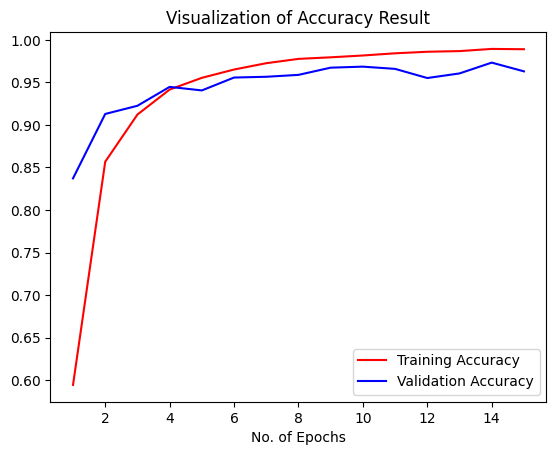

In [45]:
epochs = [i for i in range(1,16)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [46]:
class_name = validation_set.class_names

In [47]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\target\ml\PlantDisease\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [48]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 241s 14ms/step


In [49]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [50]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [51]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [52]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [53]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.98      0.98       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.99       440
                                   Apple___healthy       0.98      0.96      0.97       502
                               Blueberry___healthy       0.98      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.96      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.86      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.99      0.

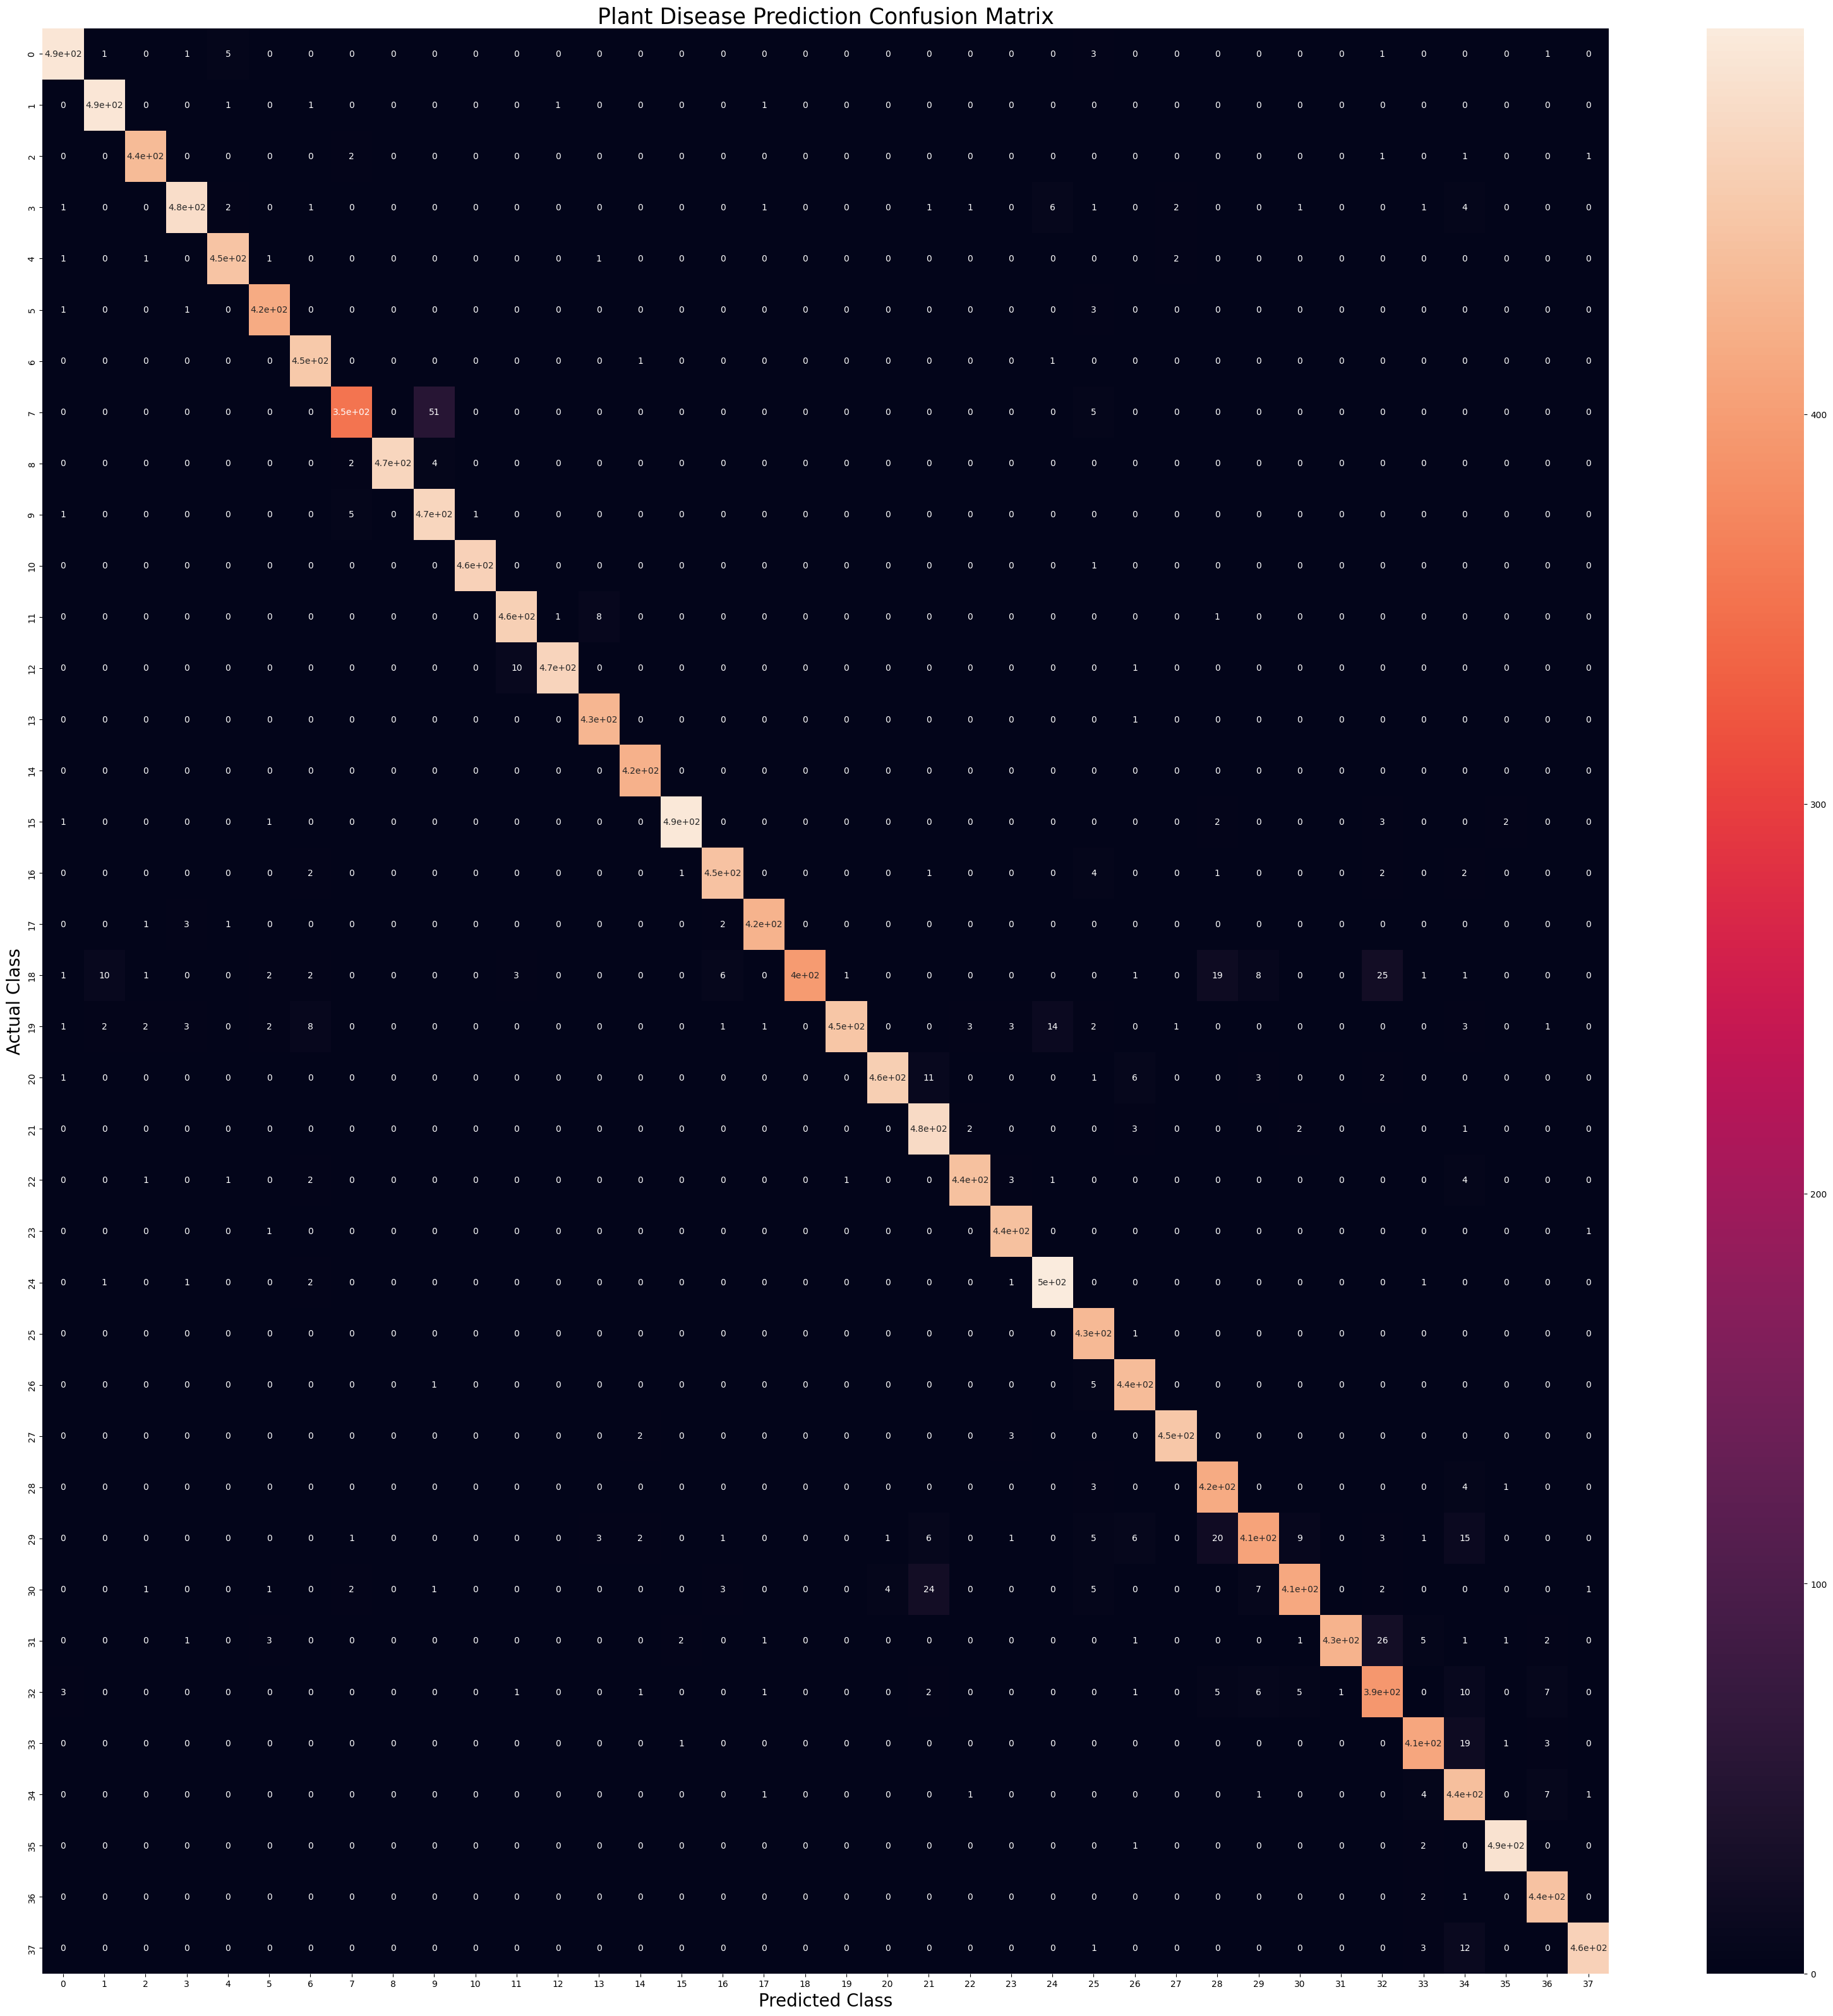

In [54]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()